# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**:    If I would be working for Motivate: 
                      - At which time during the day, the bikes are being used most.
                      - On an average, for how much distance is the bike being used the most.
           If I were a user:
                      - What are the rates, in term of rates per minute or rates per hour.
                      - Availability of the bikes, during working hours, during rush hours etc
            

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [12]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.


In [43]:
import csv
import pprint
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader =csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip =trip_reader.__next__()
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint.pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip
   # print(example_trips[city])


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [44]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if city=='Washington':
        duration=int(datum['Duration (ms)'])
        duration=(duration/(1000*60))%60
    else:
        duration=int(datum['tripduration'])
        duration=duration/60
     
    #limiting-floats-to-four-decimal-points
    duration = float("{0:.4f}".format(duration))
    return duration


# Some tests to check that your , code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [45]:
from datetime import datetime as dt
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    if city=='Washington':
        Start_date=datum['Start date']
        date=dt.strptime(Start_date,"%m/%d/%Y %H:%M")
        
    elif city=='Chicago':
        Start_date=datum['starttime']
        date=dt.strptime(Start_date,"%m/%d/%Y %H:%M")
        
    else:
        Start_date=datum['starttime']
        date=dt.strptime(Start_date,"%m/%d/%Y %H:%M:%S")
        
    month=date.month
    hour=date.hour
    day_of_week=date.strftime("%A")         
    
    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [48]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    #if the member type is registered then we will chnage it to Subscriber 
    #else if it is Casual we will change it to Customer
    #print(datum)
    if city=='Washington':
        if datum['Member Type']=='Registered':
            datum['Member Type']='Subscriber'
        elif datum['Member Type']=='Casual':
            datum['Member Type']='Customer'
    
    if city=='Washington': 
        user_type=datum['Member Type']
    else:
        user_type=datum['usertype']
    #print(user_type)
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [50]:
import csv
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader =csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration']=duration_in_mins(row, city)
            
            new_point['month'],new_point['hour'],new_point['day_of_week']=time_of_trip(row, city)
            
            new_point['user_type']=type_of_user(row, city)
            
            

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            
            

In [51]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.1231'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.4333'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.9833'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
            
            The city which has the highest number of trips: New York (276798).

            The city that has the highest proportion of trips made by subscribers: New York (245896/276798).
            
            The city that has the highest proportion of trips made by short-term customers: Chicago (17149/72131).
            

In [52]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [53]:
#for New york city
data_file = './data/NYC-2016-Summary.csv'
print(number_of_trips(data_file))

(245896, 30902, 276798)


In [54]:
#for chicago city
data_file = './data/Chicago-2016-Summary.csv'
print(number_of_trips(data_file))

(54982, 17149, 72131)


In [55]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##
#for Washington city
data_file = './data/Washington-2016-Summary.csv'
print(number_of_trips(data_file))

(51753, 14573, 66326)


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**:    
              
              For New york city:
                   The average trip length is 15.8 min minutes 
                   and 7.3% of trips are longer than 30 minutes.
                   
               For Chicago city:
                   The average trip length is 16.6 min minutes 
                   and 8.3% of trips are longer than 30 minutes.
                   
               For Washington city:
                   The average trip length is 14.2 min minutes 
                   and 7.9% of trips are longer than 30 minutes.
                    

In [56]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def avg_trip_len(filename):
    """
    This function reads in a file with trip data and return the average trip length 
    and proportion of rides made in each city are longer than 30 minutes.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize variable 
        #for averge 
        avg= 0
        ride_longer_thirty=0
        
        #and sum of all duration(add)
        add= 0
        
        #count to count the total number of trip made
        count=0
        #count to count trips longer than 30 minutes
        count_longer_thirty=0
        
        # tally up the total duration by the users
        for row in reader:
            add=add+float(row['duration'])
            count+=1
            if float(row['duration'])>30:
                count_longer_thirty+=1
        
        # compute average
        avg=add/count
        #limiting-floats-to-two-decimal-points
        avg = float("{0:.2f}".format(avg))
        
        #compute proportion of rides made in each city that are longer than 30 minutes.
        ride_longer_thirty=(count_longer_thirty/count)*100
        #limiting-floats-to-two-decimal-points
        ride_longer_thirty = float("{0:.2f}".format(ride_longer_thirty))
            
        # return average and ride longer than thirty minute
        return(avg,ride_longer_thirty)

In [57]:
#for Bay area
data_file = './examples/BayArea-Y3-Summary.csv'
print(avg_trip_len(data_file))

(14.04, 3.52)


In [58]:
#for New york city
data_file = './data/NYC-2016-Summary.csv'
print(avg_trip_len(data_file))

(15.81, 7.3)


In [59]:
#for chicago city
data_file = './data/Chicago-2016-Summary.csv'
print(avg_trip_len(data_file))

(16.56, 8.33)


In [60]:
#for washington city
data_file = './data/Washington-2016-Summary.csv'
print(avg_trip_len(data_file))

(14.22, 7.98)


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: 
              
              New York city: Customers
              Chicago city : Customers
              Washington city:Customers

In [61]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

def ridership(filename):
    """
    This function reads in a file with trip data and reports that which type of user takes longer rides.
    Subscribers or Customers
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        """
        # initialize count variables for customers and subscriber
        n_subscribers = 0
        n_customers = 0
        """
        #initilize average variable for customers and subscriber
        avg_Sub=0
        avg_Cus=0
        
        #initialize add variables for total customers duration and total subscriber duration
        add_Sub=0
        add_Cus=0
        # tally up each user_type total duration
        for row in reader:
            if row['user_type'] == 'Subscriber':
            #    n_subscribers += 1
                add_Sub=add_Sub+float(row['duration'])
            else:
            #    n_customers += 1
                add_Cus=add_Cus+float(row['duration'])
        
        #callint function number_of_trips(filename), number of Customers and Subscribers
        n_subscribers,n_customers,total_customers=number_of_trips(filename)
        
        # compute total average for Subscribers and Customers
        avg_Sub=add_Sub/n_subscribers
        avg_Cus=add_Cus/ n_customers
        
        #limiting-floats-to-one-decimal-points
        avg_Sub = float("{0:.1f}".format(avg_Sub))
        avg_Cus = float("{0:.1f}".format(avg_Cus))
        
        
        # return average of both customer and subscriber trip duration
        return(avg_Sub,avg_Cus)



In [62]:
#for Bay area
data_file = './examples/BayArea-Y3-Summary.csv'
print(ridership(data_file))

(9.5, 54.6)


In [63]:
#for New york city
data_file = './data/NYC-2016-Summary.csv'
print(ridership(data_file))

(13.7, 32.8)


In [64]:
#for chicago city
data_file = './data/Chicago-2016-Summary.csv'
print(ridership(data_file))

(12.1, 31.0)


In [65]:
#for washington city
data_file = './data/Washington-2016-Summary.csv'
print(ridership(data_file))

(11.6, 23.6)


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

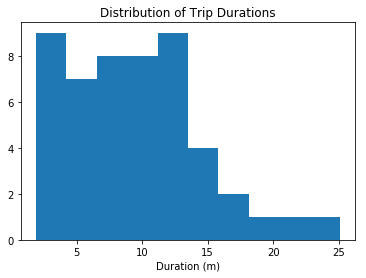

In [66]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [67]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
import csv
#load library
import matplotlib.pyplot as plt


%matplotlib inline

def trip_times(filename):
    """
    This function reads in a file with trip data nd store thr trip duration in list
    then generate a histogram from the data
    """
    
    with open(filename,'r') as f_in:
        #csv reader object
        reader=csv.DictReader(f_in)
        
        #empty list for storing trip duration
        trip_time=[]
        
        #this loop put the trip duration from file to list
        for row in reader:
            f=float(row['duration'])
            trip_time.append(f)
            
        plt.hist(trip_time)
        plt.title('Distribution of Trip Durations')
        plt.xlabel('Duration (m)')
        plt.show()
        

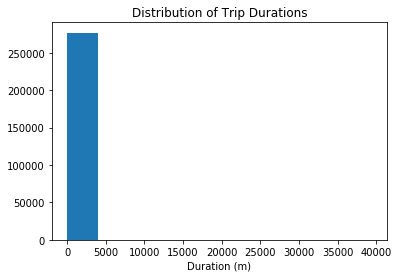

In [68]:
#for New york city
data_file = './data/NYC-2016-Summary.csv'
trip_times(data_file)

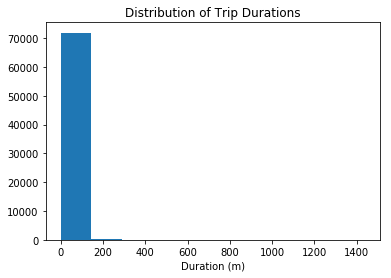

In [69]:
#for chicago city
data_file = './data/Chicago-2016-Summary.csv'
trip_times(data_file)

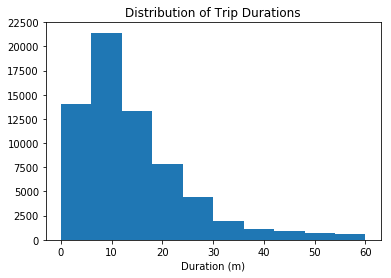

In [70]:
#for washington city
data_file = './data/Washington-2016-Summary.csv'
trip_times(data_file)

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**:Peak of the distribution city vise:
   
           New York: Subscriber- [5-10]
                     Customers - [20-25]
           Chicago : Subscriber- [5-10]
                     Customers - [20-25]
          Washington:Subscriber- [5-10]
                     Customers - [15-20]
            
            shape of each distribution: Looking at each distribution we can say that all are mostly alike, and are
                                         Right Skewed Distributed

In [71]:
## Use this and additional cells to answer Question 5. ##
import matplotlib.pyplot as plt
%matplotlib inline

def user_type_hist(filename):
    """
    This function reads in a file with trip data and plot it into a graph
    """
    with open(filename,'r') as f_in:
        #csv reader object
        reader=csv.DictReader(f_in)
        
        #list to store  Subscribers and Customers trip duration
        list_Sub=[]
        list_Cus=[]
        
        #this loop put the trip duration from file to list
        for row in reader:
            if row['user_type']=='Subscriber':
                list_Sub.append(float(row['duration']))
            else:
                list_Cus.append(float(row['duration']))
                
        #range so that only trips of duration less than 75 minutes are plotted
        range=(0,75)  
        
        # 15 bins as 75/15=5, so that we could set five-minute wide intervals
        bins=15
        
        plt.hist(list_Sub,bins,range)
        plt.title('Distribution of Trip Durations for Subscriber')
        plt.ylabel('Frequency')
        plt.xlabel('Duration (m)')
       # plt.xlim([0,75])
        plt.show()
        
        plt.hist(list_Cus,bins,range)
        plt.title('Distribution of Trip Durations for customers')
        plt.ylabel('Frequency')
        plt.xlabel('Duration (m)')
        #plt.xlim([0,75])
        plt.show()

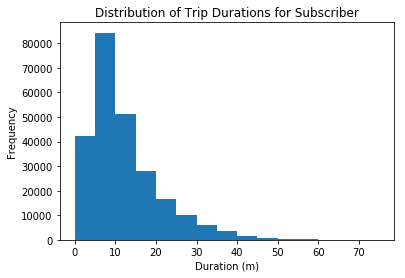

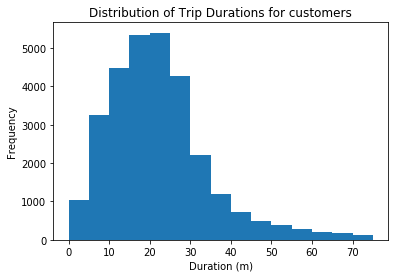

In [72]:
#for New york city Subscribers and Customers
data_file = './data/NYC-2016-Summary.csv'
user_type_hist(data_file)

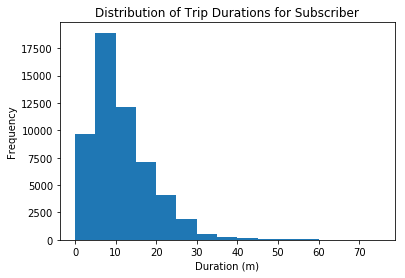

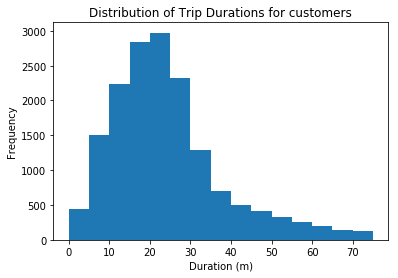

In [73]:
#for chicago city Subscribers and Customers
data_file = './data/Chicago-2016-Summary.csv'
user_type_hist(data_file)

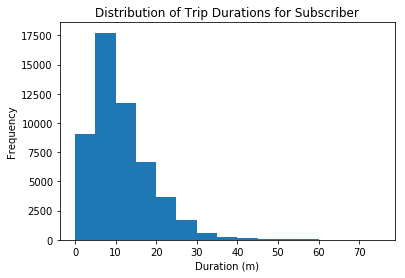

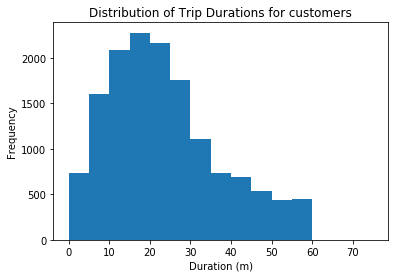

In [74]:
#for washington city Subscribers and Customers
data_file = './data/Washington-2016-Summary.csv'
user_type_hist(data_file)

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: I have done 3 more investigation:
             
             
            Data taken of New York city. 
            1: Each day which user makes the most rides(Subscribers or Customer):-
                   On Friday user type:   Subscriber use the bike most.
                   On Saturday user type: Subscriber use the bike most.
                   On Sunday user type:   Subscriber use the bike most.
                   On Monday user type:   Subscriber use the bike most.
                   On Tuesday user type:  Subscriber use the bike most.
                   On Wednesday user type:Subscriber use the bike most.
                   On Thursday user type: Subscriber use the bike most.
                   
              -We can clearly see from the data that each day subscribers are using the bike most number of time.
               
            2: WeekEnds vs Weekday- This investigation focuses that wether on weekends bike is used the most
                                     or in weekDays, on an average.
                   Average rides made on weekdays: 0.77 
                   Average rides made on weekends: 0.23 
              -Its clear from the data we get that, on weekdays means working days bike is used the most.
             
            3: The most Busy day- This investigation focuses on finding out that,
                                  which user type uses the bike most on which day.
                    Subscriber count was high on Wednesday. 
                    Customers count was high on Saturday. 
                    Totaly all most riders count was high on Wednesday.
             

In [75]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##
"""This function return a nested dictonary which contain the key as Days and their value is the number of subscriber
   and customers and total users count."""
#from collections import OrderedDict

def rider_per_day(data_file):
    
    with open(data_file,'r') as f_in:
        reader=csv.DictReader(f_in)
        
        #dictionary to store the days as keys and their info as values
        dict_count={}
        #dict_count = OrderedDict()
        #this loop put values from file to dictionary
        for row in reader:
            if row['day_of_week'] not in dict_count:
                #initilize the dictionary with initial values for subscriber, customers and total riders as 0
                #as initially count is zero
                dict_count[row['day_of_week']]={'Sus_rides':0,'Cus_rides':0,'total_rides':0}
            #Sus_rides= number of subscriber
            #Cus_rides= number of customers
            #total_rides= total number of users
            if row['user_type']=='Subscriber':
                dict_count[row['day_of_week']]['Sus_rides']+=1
            else:
                dict_count[row['day_of_week']]['Cus_rides']+=1
            dict_count[row['day_of_week']]['total_rides']+=1
            
        #print(dict_count)
        return dict_count
        

In [76]:
""" 
this function return a dictionary which contains keys as days 
and their value as (Subscribers or Customers) as per the maximum ride.

"""
def day_count(data_file):
    with open(data_file,'r') as f_in:
        reader=csv.DictReader(f_in)
        
        #it reuses the function rider_per_day(data_file)
        dict_count=rider_per_day(data_file)
        
        #dictionary which contains keys as days 
        #and their value as (Subscribers or Customers)
        day_counts={}
        
        for row in reader:
            #compare Subscribers count and Customers count per day
            if dict_count[row['day_of_week']]['Sus_rides']>dict_count[row['day_of_week']]['Cus_rides']:
                day_counts[row['day_of_week']]='Subscriber'
            else:
                day_counts[row['day_of_week']]='Customer'
        #print(day_counts)
        return day_counts
        

In [77]:
#for New york city 
#this tell us that what type of user use the bikes most in particular day
data_file = './data/NYC-2016-Summary.csv'
dayCount=day_count(data_file)
for day,user in dayCount.items():
    print("on {} user type: {} use the bike most".format(day,user) )

on Friday user type: Subscriber use the bike most
on Saturday user type: Subscriber use the bike most
on Sunday user type: Subscriber use the bike most
on Monday user type: Subscriber use the bike most
on Tuesday user type: Subscriber use the bike most
on Wednesday user type: Subscriber use the bike most
on Thursday user type: Subscriber use the bike most


In [87]:
"""
this function return average of number of rides made on weekdays 
and weekend.
"""
def week_weekend(data_file):
    with open(data_file,'r') as f_in:
        reader=csv.DictReader(f_in)
        
        #it reuses the function rider_per_day(data_file)
        #which store total number of rides of per day
        dict_count=rider_per_day(data_file)
        
        #initilize the count variables as zero
        #it will store count of the ride made in week days and weekends
        weekDay_count=0
        weekend_count=0
        
        for day,info in dict_count.items():
            #for weekend
            if day=='Saturday' or day=='Sunday':
                weekend_count+=info['total_rides']
            else:
                #for weekdays
                weekDay_count+=info['total_rides']
        #total number of rider per week        
        Total_count=weekDay_count+weekend_count
         
        #finding the average for both weekdays and weekends
        weekDay_count=weekDay_count/Total_count
        weekend_count=weekend_count/Total_count
        
        #limiting-floats-to-two-decimal-points
        weekDay_count= float("{0:.2f}".format(weekDay_count))
        weekend_count= float("{0:.2f}".format(weekend_count))
        
        #print(weekend_count,weekDay_count)
        return weekend_count,weekDay_count

In [88]:
"""for New york city, weekend vs weekdays

-this tell us that wether due to weekend, is there a rise in number of user than regular week days
-it compares average rides made on weekdays and weekend
"""
data_file = './data/NYC-2016-Summary.csv'
weekend_count,weekDay_count=week_weekend(data_file)
print("Average rides made on weekdays: {1} \nAverage rides made on weekends: {0} ".format(weekend_count,weekDay_count))

Average rides made on weekdays: 0.77 
Average rides made on weekends: 0.23 


In [80]:
"""
this function return the most busy day for each customer, subscriber and in total users.
"""
def busy_day(data_file):
    with open(data_file,'r') as f_in:
        reader=csv.DictReader(f_in)
        
        #this function reuses rider_per_day(data_file)
        #as it return an dictionary which stores rides made by each type of users
        dict_count=rider_per_day(data_file)
        
        #initilization
        #max_Sub,max_Cus,max_tot will store maximum number of riders for each individual group
        #Sub_day,Cus_day,Tot_day, this will store days which will have maximum number of rides for each group
        max_Sub,max_Cus,max_tot=0,0,0
        Sub_day,Cus_day,Tot_day='','',''
        
        #this loop iterate the dictionary
        for day,info in dict_count.items():
            #for finding out the day on which maximum number of rides were made for Subscriber
            if max_Sub<info['Sus_rides']:
                max_Sub=info['Sus_rides']
                Sub_day=day
            #for finding out the day on which maximum number of rides were made for Customers
            if max_Cus<info['Cus_rides']:
                max_Cus=info['Cus_rides']
                Cus_day=day
            #for finding out the day on which maximum number of rides were made
            if max_tot<info['total_rides']:
                max_tot=info['total_rides']
                Tot_day=day
       # print(max_Sub,max_Cus,max_tot)        
       # print(Sub_day,Cus_day,Tot_day)        
        return Sub_day,Cus_day,Tot_day     
        
        
        

In [81]:
#for New york city, most busy day
#this tell us on which day subscriber and customer use the bikes the most 
data_file = './data/NYC-2016-Summary.csv'
Sub_day,Cus_day,Tot_day=busy_day(data_file)
print(" Most Subscriber rides bike on {} \n Most Customers rides bike on {} \n Most Riders rides on {}".format(Sub_day,Cus_day,Tot_day)) 

 Most Subscriber rides bike on Wednesday 
 Most Customers rides bike on Saturday 
 Most Riders rides on Wednesday


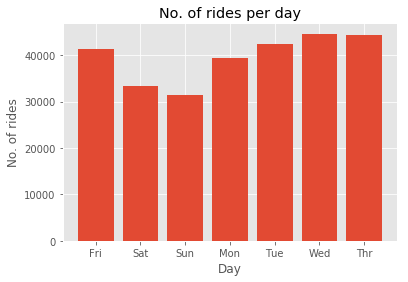

In [82]:
"""
visuilization to check which day user rides the bike the most
"""
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed','Thr']
rides_per_day = []

data_file = './data/NYC-2016-Summary.csv'
dict_count=rider_per_day(data_file)

for day,info in dict_count.items():
    rides_per_day.append(info['total_rides'])
    #print(rides_per_day)   
    
    
x_position = [i for i, _ in enumerate(x)]

plt.bar(x_position,rides_per_day)
plt.xlabel("Day")
plt.ylabel("No. of rides")
plt.title("No. of rides per day")

plt.xticks(x_position, x)

plt.show()


In [ ]:
#from the above graph we can see that on wednesday most number of users ride the bike

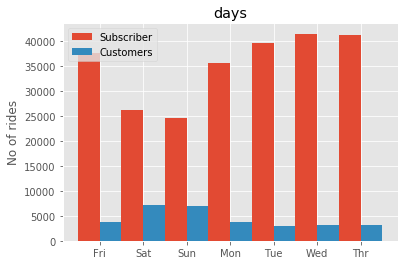

In [83]:
"""
this plot a graph which compares the user_type per day
plus
we can also tell from it that on what day subscriber ride the most and on which day customer
"""
import numpy as np

N = 7
Sub = []
Cus = []

data_file = './data/NYC-2016-Summary.csv'
dict_count=rider_per_day(data_file)

for day,info in dict_count.items():
    Sub.append(info['Sus_rides'])
    Cus.append(info['Cus_rides'])

index = np.arange(N) 
width = 0.50       
plt.bar(index, Sub, width, label='Subscriber')
plt.bar(index + width, Cus, width,label='Customers')

plt.ylabel('No of rides')
plt.title('days')

plt.xticks(index + width / 2, ('Fri', 'Sat', 'Sun', 'Mon', 'Tue','Wed','Thr'))
plt.legend()
plt.show()

In [84]:
#from grap above we can tell that on wednesday subscribers rate was high and on saturday customers rate was high.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: Data Science is an very intresting technology to study and it could be applied in various places to improve lot of things just by visualizing the data.
           
 -Indain railway is one of the largest railway service in world and one of the most profitable also. By adding data science to it, its productivity can b incresed, maintenance could b improved, it could reach to the places where citizen actually nead it.
- We can compare metro with classic railways, and can find out intresting data that which is most benificial for citizens.
-From this data of railway debate about bringing bullet train in India will also finish, as data will tell every thing
    
           
> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [89]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0